In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winnerpredictionchallenge/IPL 2020 Squads.csv
/kaggle/input/winnerpredictionchallenge/Traning Deliveries Matches IPL 2008-2019.csv
/kaggle/input/winnerpredictionchallenge/Qualifiers IPL 2008-2019.csv
/kaggle/input/winnerpredictionchallenge/Testset Matches IPL 2020.csv
/kaggle/input/winnerpredictionchallenge/Training Matches IPL 2008-2019.csv
/kaggle/input/winnerpredictionchallenge/sample submission.csv


# Data Preparation and Cleaning

Let’s start by reading the csv file to Pandas DataFrame.

In [2]:
matches=pd.read_csv("../input/winnerpredictionchallenge/Training Matches IPL 2008-2019.csv")
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
5,65,2008,Jaipur,21-04-2008,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
6,66,2008,Hyderabad,22-04-2008,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN
7,67,2008,Chennai,23-04-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
8,68,2008,Hyderabad,24-04-2008,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
9,69,2008,Chandigarh,25-04-2008,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN


So there are 756 rows and 18 columns. 756 rows imply that there were 756 IPL matches held between 2008 and 2019.

# The dataset has 18 columns. Let’s get acquainted with the columns.

id: The IPL match id.

season: The IPL season

city: The city where the IPL match was held.

date: The date on which the match was held.

team1: One of the teams of the IPL match

team2: The other team of the IPL match

toss_winner: The team that won the toss

toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’

result: The result(‘normal’, ‘tie’, ‘no result’) of the match.

dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.

winner: The winner of the match.

win_by_runs: Provides the runs by which the team batting first won

win_by_runs: Provides the number of wickets by which the team batting second won.

player_of_match: The outstanding player of the match.

venue: The venue where the match was hosted.

umpire1: One of the two on-field umpires who officiate the match.

umpire2: One of the two on-field umpires who officiate the match.

umpire3: The off-field umpire who officiates the match

In [3]:
#checking null values
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

It’s imperative to know the count of NaN values for each column before we proceed further.The column ‘umpire3’ has a significant number of NaN values. As the off-field umpire parameter is insignificant, we can drop this column. The other columns that have Nan values are of type object(Pandas equivalent of Python String data type) and are very few in number(<=7).

In [4]:
matches.describe()


,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:

#filling null values
matches['winner'].fillna('Draw', inplace=True)
matches['city'].fillna('Dubai', inplace=True)

In [7]:
matches = matches.drop(columns=['umpire3'], axis=1)

In [8]:
matches.loc[matches.winner=='Draw','winner']

241    Draw
486    Draw
511    Draw
744    Draw
Name: winner, dtype: object

In [9]:
#Replacing Full names of the teams with their abbreviations 
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Delhi Capitals' ,
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','DD','SRH','RPS','RPS','KTK','PW'],inplace=True)

# Exploratory Analysis and Visualization

Now that our data set has been cleaned up, it’s time to do the in-depth analysis and visualization.


Let’s begin by importingmatplotlib.pyplot and seaborn.

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 15)
matplotlib.rcParams['figure.facecolor'] = '#00000000'




# The team with the most number of wins per season.

Text(0.5, 1.0, 'Toss-Win & Toss-Lose')

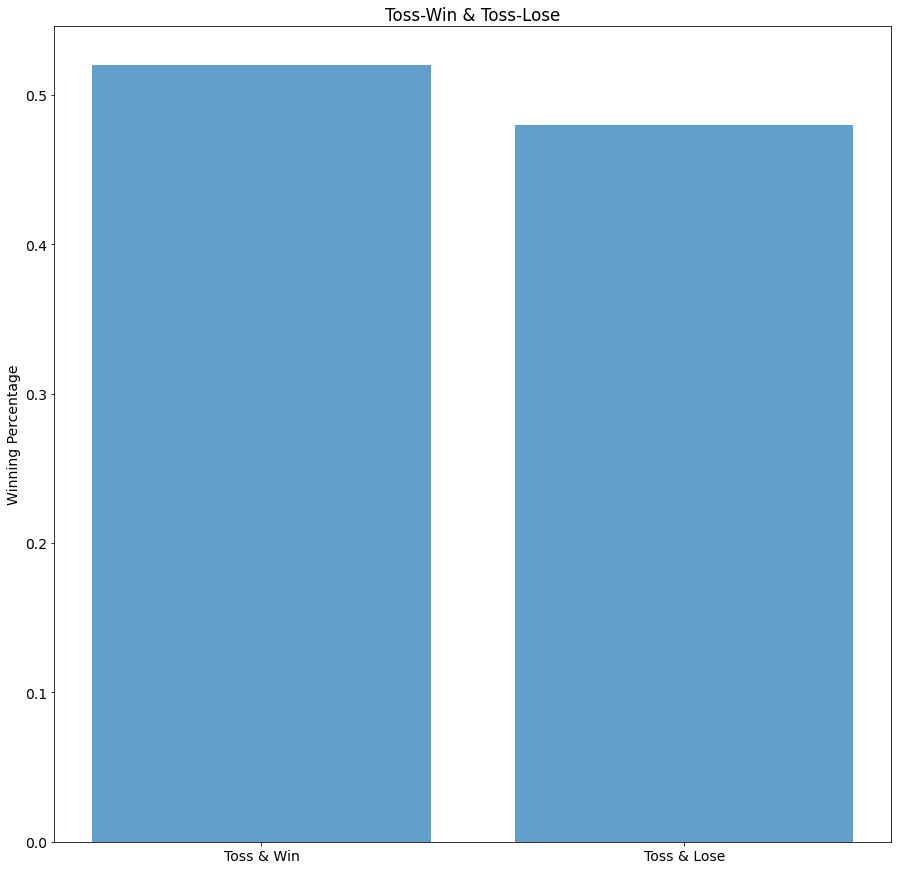

In [11]:
objects = ('Toss & Win','Toss & Lose')
y_pos = np.arange(len(objects))
a=len(matches[matches['toss_winner']==matches['winner']])/len(matches)
b=(len(matches)-(len(matches[matches['toss_winner']==matches['winner']])))/len(matches)
performance = [a,b]
plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Winning Percentage')
plt.title('Toss-Win & Toss-Lose')  

# The team with the most number of wins per season.

Each IPL season has a fair share of excitement and adulation. No team other than Chennai Super Kings(in 2010 and 2011) was able to win
the IPL trophy in succession. That is a testimony to the unpredictability of IPL.


Let’s analyze the team with the most wins in each season.

In [12]:
teams_per_season = matches.groupby('season')['winner'].value_counts()
teams_per_season

season  winner
2008    RR        13
        KXIP      10
        CSK        9
        DD         7
        MI         7
                  ..
2019    KXIP       6
        SRH        6
        RCB        5
        RR         5
        Draw       1
Name: winner, Length: 103, dtype: int64

In [13]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'RR'), 13)
((2009, 'DD'), 10)
((2010, 'MI'), 11)
((2011, 'CSK'), 11)
((2012, 'KKR'), 12)
((2013, 'MI'), 13)
((2014, 'KXIP'), 12)
((2015, 'CSK'), 10)
((2016, 'SRH'), 11)
((2017, 'MI'), 12)
((2018, 'CSK'), 11)
((2019, 'MI'), 11)


In [14]:
win_per_season_df

,year,team,wins
0,2008,RR,13
0,2009,DD,10
0,2010,MI,11
0,2011,CSK,11
0,2012,KKR,12
0,2013,MI,13
0,2014,KXIP,12
0,2015,CSK,10
0,2016,SRH,11
0,2017,MI,12


The number of wins is a discrete value. Hence, we will plot a bar chart(barplot in Seaborn).


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


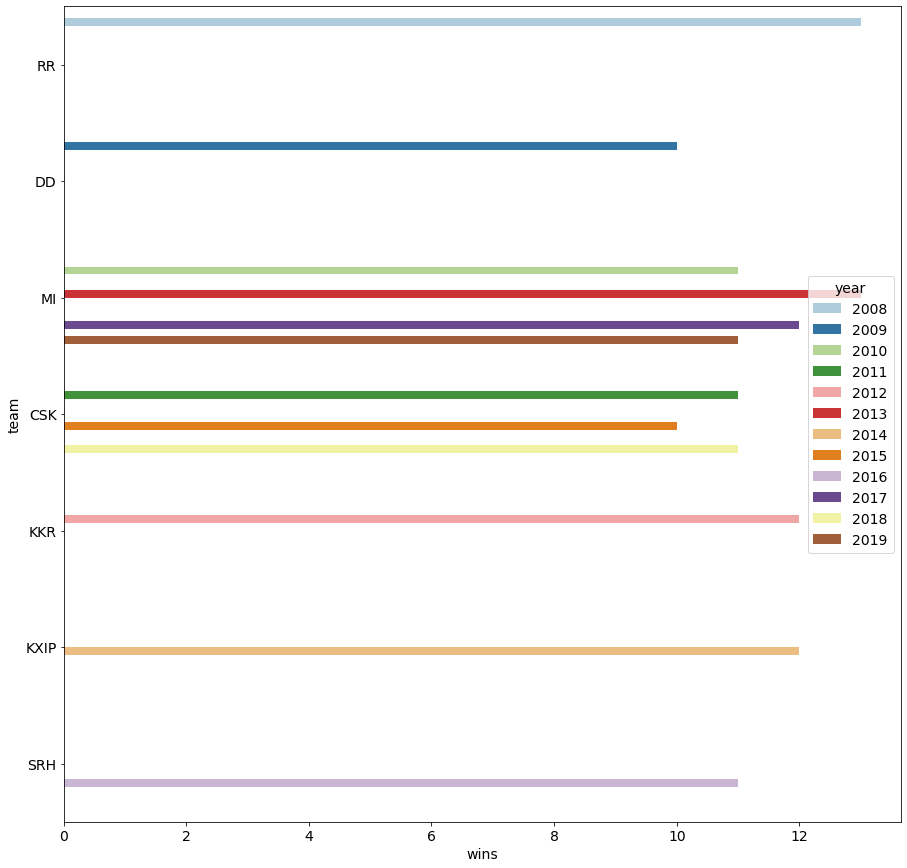

In [15]:
import seaborn as sns
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired');

From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).
Observations:
Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

# The venue that hosted the maximum number of matches


In [16]:
venue_ser = matches['venue'].value_counts()

In [17]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

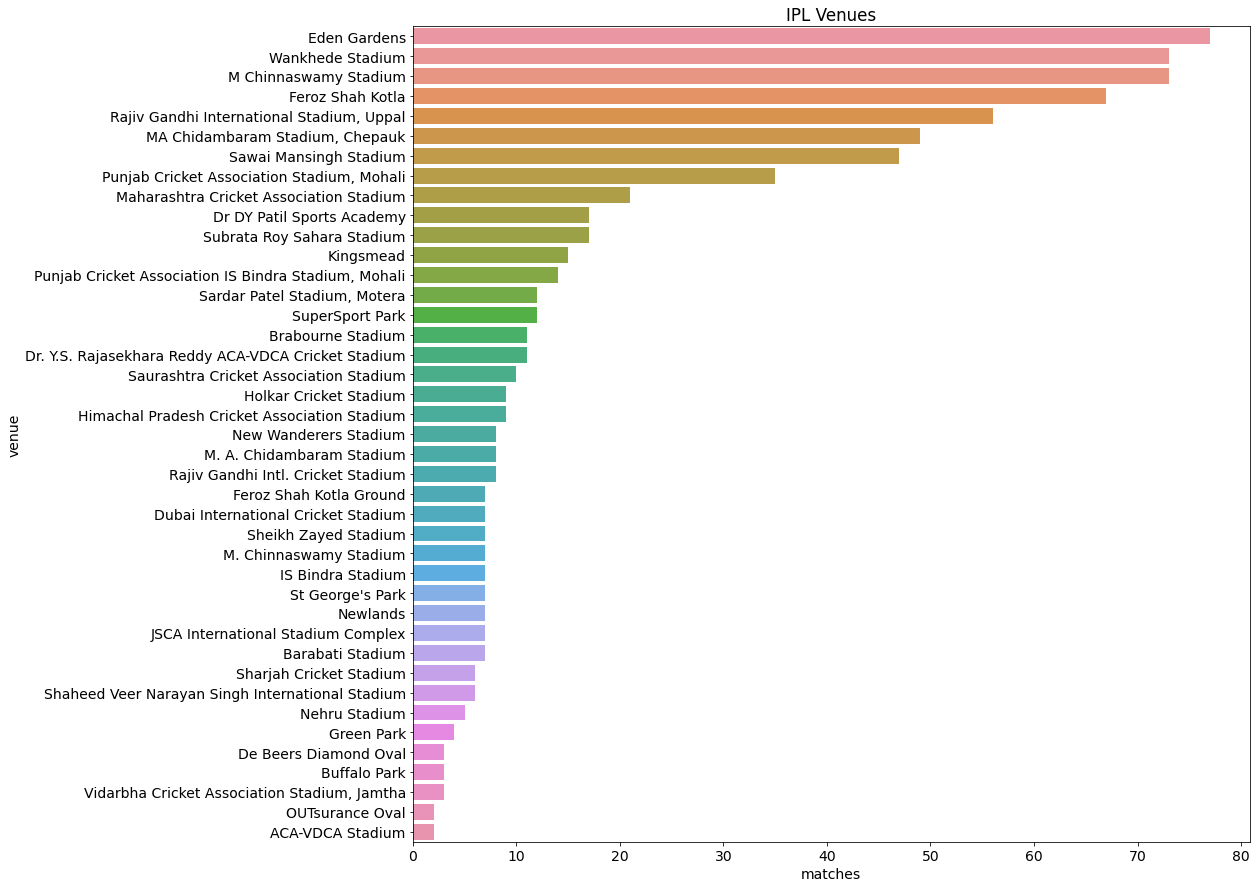

In [18]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [19]:
venue_df

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


# Observations:

Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.

Till 2019, IPL matches were hosted by 40 venues.

# The most successful IPL team

In a game of sports, every team competes for victory. Hence, the team that has registered the most number of victories is the most successful.

In [20]:
team_wins_ser = matches['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [21]:
team_wins_df 

,team,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,DD,77
6,RR,75
7,SRH,58
8,DC,29
9,RPS,15


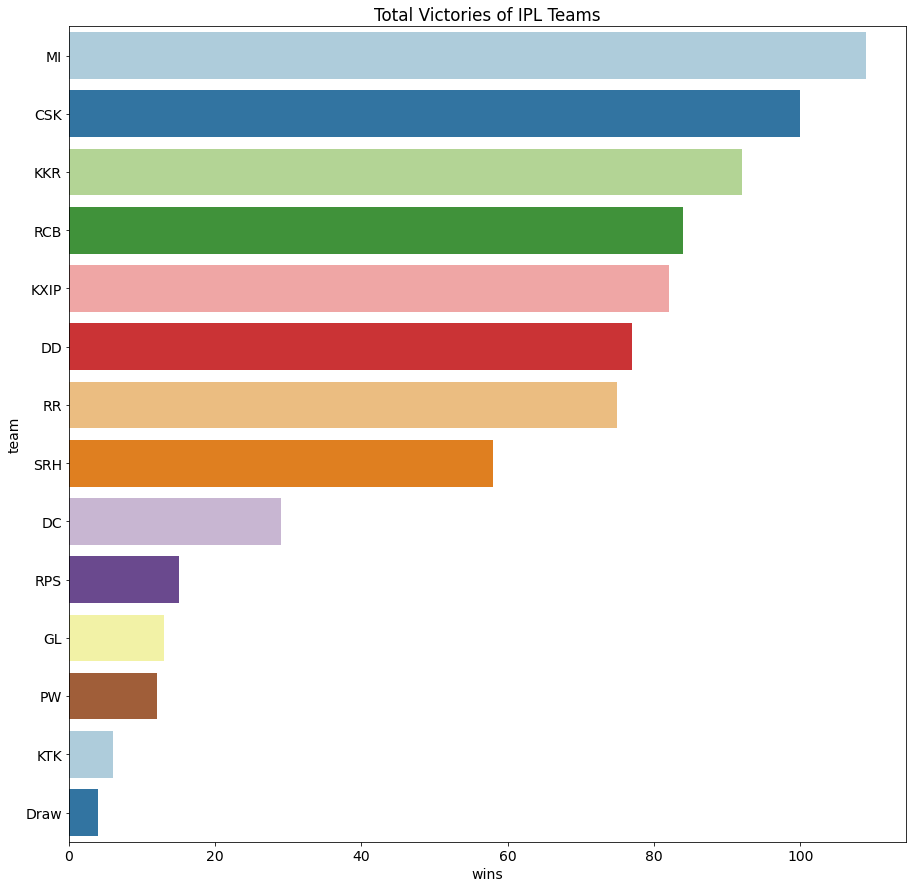

In [22]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

# Observations:

Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) followed 
by Chennai Super Kings and Kolkata Knight Riders.

# Most Valuable Player

Winning matters the most in a competitive league match. 

If a player makes the most significant contribution to his team’s victory, then he’s chosen as the player_of_match. 

The player who has won the player_of_match title on most occasions is the most valuable player.


In [23]:
mvp_ser = matches['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1  

In [24]:
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


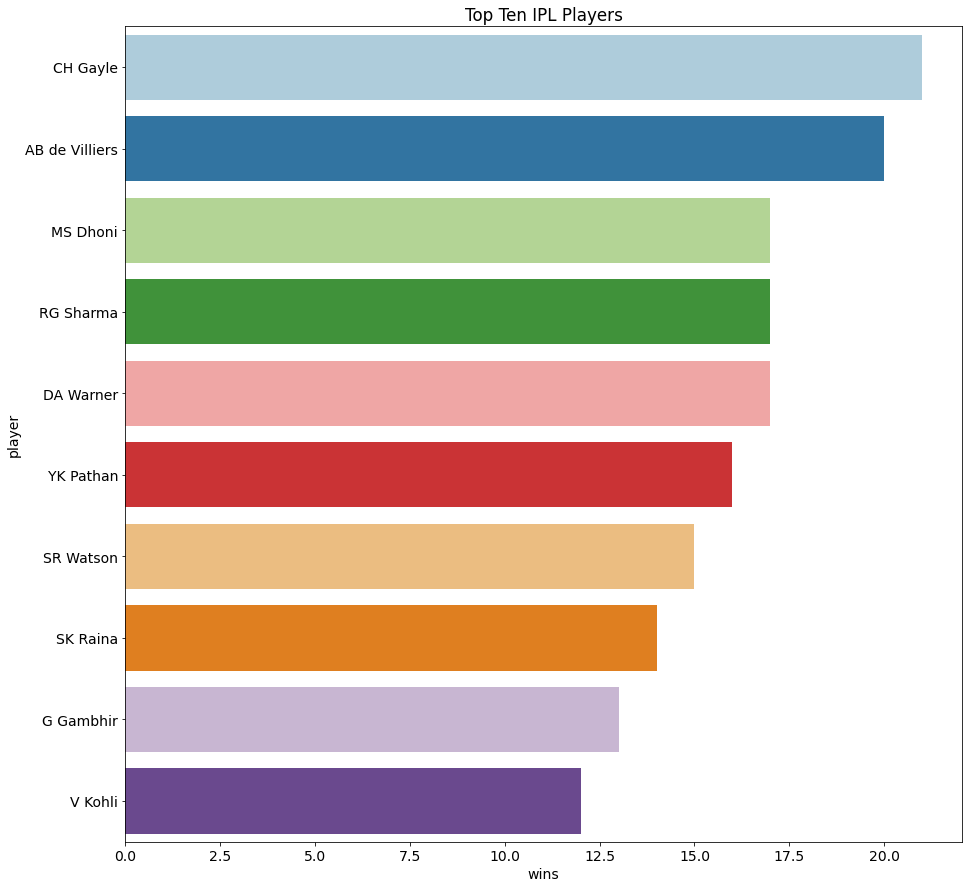

In [25]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

# Observations:

Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.

Six Indian players have figured in the top ten IPL players list

# The team that won the most number of toss

In [26]:
 toss_ser = matches['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

In [27]:
toss_df

,team,wins
0,MI,98
1,KKR,92
2,DD,90
3,CSK,89
4,RCB,81
5,KXIP,81
6,RR,80
7,SRH,46
8,DC,43
9,PW,20


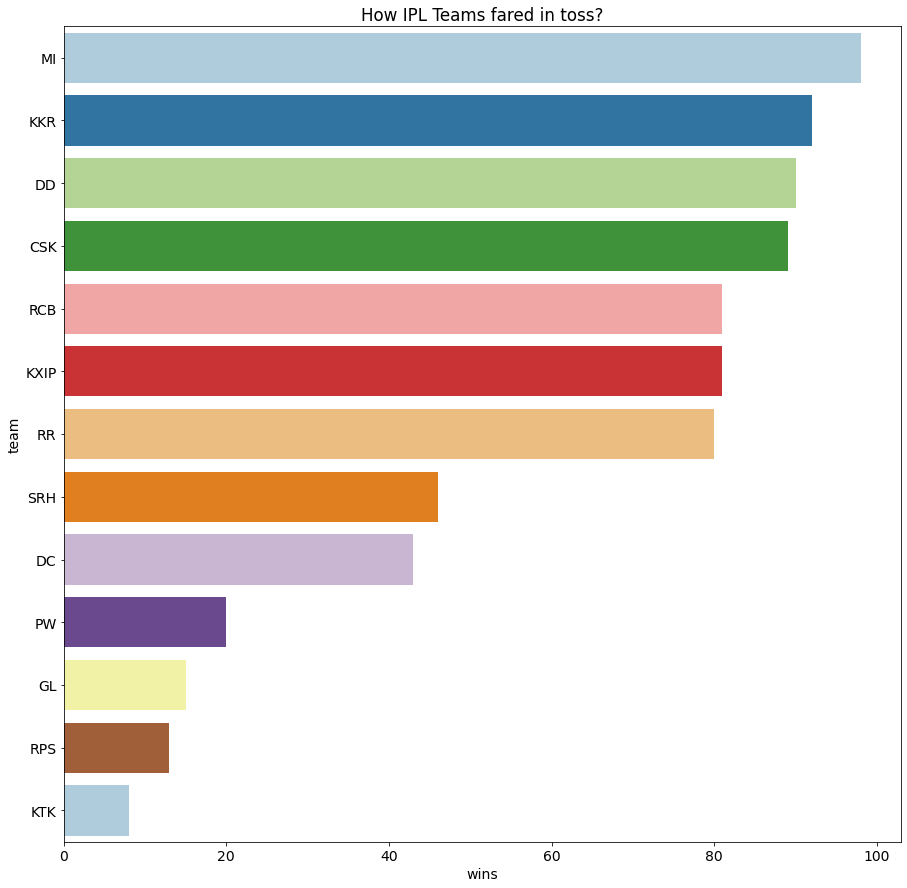

In [28]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

# Observations:

Mumbai Indians has won the most toss(till 2019) in IPL history.

All the top teams in IPL are successful in winning the toss as well.

In [29]:

#Finding Co-relations among attributes
corrMatrix=matches.corr()
corrMatrix

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


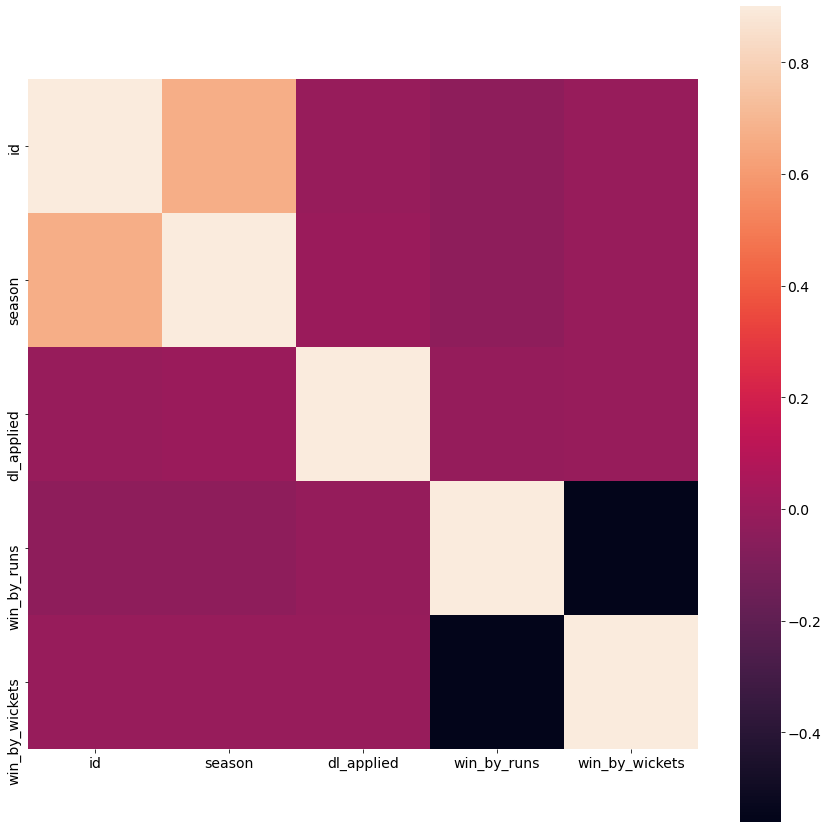

In [30]:
sns.heatmap(corrMatrix, vmax = .9, square = True)
plt.show()

In [31]:

#Checking for null values
matches.apply(lambda x: sum(x.isnull()),axis=0)

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [32]:
matches.replace(['Bangalore','Chandigarh','Delhi','Mumbai','Kolkata','Jaipur','Hyderabad','Chennai','Cape Town',
                 'Port Elizabeth','Durban','Centurion','East London','Johannesburg','Kimberley','Bloemfontein','Ahmedabad',
                 'Cuttack','Nagpur','Dharamsala','Kochi','Indore','Visakhapatnam','Pune','Raipur','Ranchi','Abu Dhabi','Sharjah',
                 'Dubai','Rajkot','Kanpur','Mohali','Bengaluru'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
                                                                  , 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],inplace=True)

In [33]:
matches.drop(columns=['umpire1','umpire2'], inplace =True)

In [34]:
matches.drop(columns=['player_of_match'], inplace =True)


In [35]:
matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
0,60,2008,1,18-04-2008,KKR,RCB,RCB,field,normal,0,KKR,140,0,M Chinnaswamy Stadium
1,61,2008,2,19-04-2008,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,"Punjab Cricket Association Stadium, Mohali"
2,62,2008,3,19-04-2008,RR,DD,RR,bat,normal,0,DD,0,9,Feroz Shah Kotla
3,63,2008,4,20-04-2008,MI,RCB,MI,bat,normal,0,RCB,0,5,Wankhede Stadium
4,64,2008,5,20-04-2008,DC,KKR,DC,bat,normal,0,KKR,0,5,Eden Gardens


In [36]:
matches.isnull().sum()

id                0
season            0
city              0
date              0
team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
dl_applied        0
winner            0
win_by_runs       0
win_by_wickets    0
venue             0
dtype: int64

In [37]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,KKR,RCB,1,field,RCB,M Chinnaswamy Stadium,KKR
1,CSK,KXIP,2,bat,CSK,"Punjab Cricket Association Stadium, Mohali",CSK


In [38]:
matches["winner"] = np.where(matches["winner"] == matches["team1"], 1, 0)
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,KKR,RCB,1,field,RCB,M Chinnaswamy Stadium,1
1,CSK,KXIP,2,bat,CSK,"Punjab Cricket Association Stadium, Mohali",1


In [39]:
matches['toss_decision'] = matches['toss_decision'].map({'field':0,'bat':1})
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,KKR,RCB,1,0,RCB,M Chinnaswamy Stadium,1
1,CSK,KXIP,2,1,CSK,"Punjab Cricket Association Stadium, Mohali",1


In [40]:
matches['team1'] = matches['team1'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'KXIP':6, 'SRH':7,'DD':8, 'GL': 9, 'RPS':10, 'KTK':11, 'PW':12})
matches['team2'] = matches['team2'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'KXIP':6, 'SRH':7, 'DD':8, 'GL': 9, 'RPS':10, 'KTK':11, 'PW':12})
matches['toss_winner'] = matches['toss_winner'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'KXIP':6, 'SRH':7, 'DD':8, 'GL': 9, 'RPS':10, 'KTK':11, 'PW':12})

matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,4,1,1,0,1,M Chinnaswamy Stadium,1
1,0,6,2,1,0,"Punjab Cricket Association Stadium, Mohali",1


In [41]:
matches.drop(columns=['venue'], inplace =True)
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,winner
0,4,1,1,0,1,1
1,0,6,2,1,0,1


In [42]:
matches.describe()

,team1,team2,city,toss_decision,toss_winner,winner
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,4.424603,4.625661,9.529101,0.387566,4.431217,0.443122
std,3.063284,3.115665,8.959686,0.487517,3.056948,0.497083
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,4.000000,0.000000,2.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,4.000000,0.000000
75%,7.000000,7.000000,12.000000,1.000000,7.000000,1.000000
max,12.000000,12.000000,33.000000,1.000000,12.000000,1.000000


In [43]:
# data for training purpose

x=matches[['team1', 'team2', 'city']]
y=matches[['winner']]
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.2,random_state=49)

In [44]:
# for testing the data
matches_testdata= pd.read_csv("/kaggle/input/winnerpredictionchallenge/Testset Matches IPL 2020.csv")
matches_testdata.head()   

,id,season,city,date,team1,team2,player_of_match,venue,umpire1,umpire2,umpire3
0,1216492,2020,Abu Dhabi,9/19/2020,MI,CSK,AT Rayudu,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,2020,Dubai (DSC),9/20/2020,DC,KXIP,MP Stoinis,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel
2,1216534,2020,Dubai (DSC),9/21/2020,SRH,RCB,YS Chahal,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
3,1216496,2020,Sharjah,9/22/2020,RR,CSK,SV Samson,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan
4,1216508,2020,Abu Dhabi,9/23/2020,KKR,MI,RG Sharma,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma


In [45]:
testdata = matches_testdata.copy()

In [46]:
testdata.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [47]:
testdata.drop(['id','season','date','player_of_match','venue','umpire1','umpire2','umpire3'],axis=1,inplace=True)

In [48]:
test_copy = matches_testdata.copy()

In [49]:




testdata.replace(['Bangalore','Chandigarh','Delhi','Mumbai','Kolkata','Jaipur','Hyderabad','Chennai','Cape Town',
                 'Port Elizabeth','Durban','Centurion','East London','Johannesburg','Kimberley','Bloemfontein','Ahmedabad',
                 'Cuttack','Nagpur','Dharamsala','Kochi','Indore','Visakhapatnam','Pune','Raipur','Ranchi','Abu Dhabi','Sharjah',
                 'Dubai', 'Dubai (DSC)','Rajkot','Kanpur','Mohali','Bengaluru'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
                                                                  , 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 29,30, 31, 32, 33],inplace=True)


testdata['team1'] = testdata['team1'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'KXIP':6, 'SRH':7})
testdata['team2'] = testdata['team2'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'KXIP':6, 'SRH':7})
testdata.head()

,city,team1,team2
0,27,3,0
1,29,2,6
2,29,7,1
3,28,5,0
4,27,4,3


In [50]:
matches['city'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

# Training Models


In [51]:
from sklearn.metrics import accuracy_score , roc_curve, roc_auc_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x,y)
pred_y=logreg.predict(x)
logreg.score(x,y)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5674603174603174

In [52]:
logreg.fit(train_x, train_y)# for logistic regression model
# cheking training accuracy
y_pred1 = logreg.predict(train_x)
predictions = [round(value) for value in y_pred1]
accuracy = accuracy_score(train_y,predictions)
print(logreg.score(train_x, train_y))
accuracy

0.5579470198675497


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5579470198675497

In [53]:
# cheking initial test accuracy # for logistic regression model
y_pred = logreg.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy
print(logreg.score(test_x,test_y))
accuracy

0.5855263157894737


0.5855263157894737

In [54]:
from sklearn.metrics import accuracy_score , roc_curve, roc_auc_score,confusion_matrix
from sklearn.metrics import classification_report
predictions = [round(value) for value in y_pred]
auc_logis = roc_auc_score(test_y, predictions)
print(classification_report(test_y,predictions))# for logistic regression model
auc_logis

              precision    recall  f1-score   support

           0       0.58      0.81      0.67        80
           1       0.62      0.33      0.43        72

    accuracy                           0.59       152
   macro avg       0.60      0.57      0.55       152
weighted avg       0.59      0.59      0.56       152



0.5729166666666666

In [55]:
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , roc_curve, roc_auc_score,confusion_matrix
from sklearn.metrics import classification_report

In [56]:
# for XGBoost model
xgb=xgb.XGBRegressor()
xgb.fit(train_x,train_y)
pred_yxgb=xgb.predict(test_x)
print(xgb.score(train_x,train_y))
logreg.score(train_x,train_y)

0.6080838989635795


0.5579470198675497

In [57]:
# cheking initial test accuracy # for XGBoost model
y_pred = xgb.predict(test_x)
predictions = [round(value) for value in pred_yxgb]
accuracy = accuracy_score(test_y,predictions)

accuracy


0.5986842105263158

In [58]:
# for XGBoost model
predictions = [round(value) for value in y_pred]
auc_xgb = roc_auc_score(test_y, predictions)
print(classification_report(test_y,predictions))
auc_xgb

              precision    recall  f1-score   support

           0       0.61      0.65      0.63        80
           1       0.58      0.54      0.56        72

    accuracy                           0.60       152
   macro avg       0.60      0.60      0.60       152
weighted avg       0.60      0.60      0.60       152



0.5958333333333332

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [60]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.svm import SVC

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(data.shape[0], n_folds=7)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome]) 

In [61]:
'''model=xgb.XGBRegressor()
outcome_var= train_y
predictor_var = train_x
df=[train_x, train_y]
model = LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)'''


'model=xgb.XGBRegressor()\noutcome_var= train_y\npredictor_var = train_x\ndf=[train_x, train_y]\nmodel = LogisticRegression()\nclassification_model(model, df,predictor_var,outcome_var)'

In [62]:
#SVM
svm=SVC()
svm.fit(train_x,train_y)
svm.score(test_x,test_y)
y_pred = svm.predict(test_x)
predictions = [round(value) for value in y_pred]
auc_svc = roc_auc_score(test_y, predictions)
#print(confusion_matrix(test_x,y_pred))
print(classification_report(test_y,y_pred))
print("Accuracy of SVM classifier on train set:", svm.score(train_x,train_y))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(test_x,test_y)*100))
auc_svc

              precision    recall  f1-score   support

           0       0.56      0.97      0.71        80
           1       0.83      0.14      0.24        72

    accuracy                           0.58       152
   macro avg       0.70      0.56      0.47       152
weighted avg       0.69      0.58      0.49       152

Accuracy of SVM classifier on train set: 0.5811258278145696
Accuracy of SVM classifier on test set: 57.8947


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5569444444444445

In [63]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(train_x,train_y)
dtree.score(test_x,test_y)
y_pred = dtree.predict(test_x)
predictions = [round(value) for value in y_pred]
auc_dtree = roc_auc_score(test_y, predictions)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y,predictions))
print("Accuracy of Decision Tree classifier on train set:", dtree.score(train_x,train_y))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(test_x,test_y)*100))
auc_dtree

[[56 24]
 [37 35]]
              precision    recall  f1-score   support

           0       0.60      0.70      0.65        80
           1       0.59      0.49      0.53        72

    accuracy                           0.60       152
   macro avg       0.60      0.59      0.59       152
weighted avg       0.60      0.60      0.59       152

Accuracy of Decision Tree classifier on train set: 0.8410596026490066
Accuracy of decision tree classifier on test set: 59.8684


0.5930555555555556

In [64]:
#Random Forest Classifier
clrf=RandomForestClassifier(n_estimators=100)
clrf.fit(train_x,train_y)
clrf.score(test_x,test_y)
y_pred = clrf.predict(test_x)
predictions = [round(value) for value in y_pred]
auc_clrf = roc_auc_score(test_y, predictions)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y,predictions))
print("Accuracy of Random Forest classifier on train set:", clrf.score(train_x,train_y))
print('Accuracy of Random Forest classifier on test set: {:.4f}'.format(clrf.score(test_x,test_y)*100))
auc_clrf

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[54 26]
 [34 38]]
              precision    recall  f1-score   support

           0       0.61      0.68      0.64        80
           1       0.59      0.53      0.56        72

    accuracy                           0.61       152
   macro avg       0.60      0.60      0.60       152
weighted avg       0.60      0.61      0.60       152

Accuracy of Random Forest classifier on train set: 0.8410596026490066
Accuracy of Random Forest classifier on test set: 60.5263


0.6013888888888889

In [65]:
#XGB Classifier
xgbcl=XGBClassifier()
xgbcl.fit(train_x,train_y)
xgbcl.score(test_x,test_y)
y_pred = xgbcl.predict(test_x)
predictions = [round(value) for value in y_pred]
auc_xgbcl = roc_auc_score(test_y, predictions)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y,predictions))
print("Accuracy of XBB classifier on train set:", xgbcl.score(train_x,train_y))
print('Accuracy of XGB classifier on test set: {:.4f}'.format(xgbcl.score(test_x,test_y)*100))
auc_xgbcl

[10:08:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[51 29]
 [36 36]]
              precision    recall  f1-score   support

           0       0.59      0.64      0.61        80
           1       0.55      0.50      0.53        72

    accuracy                           0.57       152
   macro avg       0.57      0.57      0.57       152
weighted avg       0.57      0.57      0.57       152

Accuracy of XBB classifier on train set: 0.8311258278145696
Accuracy of XGB classifier on test set: 57.2368


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.56875

Random forest classifier has increased the predicitive power of our model.Great, let's do some hyperparameter tuning and see if we can increase our accuracy more.


Hyperparameters of Random forest classifier:
bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False

Let's now try to tune some hyperparameters using the GridSearchCV algorithm

In [66]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']}

In [67]:
grid_search = GridSearchCV(estimator=clrf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [68]:
#grid_search.fit(train_x,train_y)

In [69]:
#let's see the best parameters as per our grid search
#grid_search.best_params_

In [70]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 10,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 500,random_state=6)

In [71]:
rand_clf.fit(train_x,train_y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=500, random_state=6)

In [72]:
rand_clf.score(test_x,test_y)

0.6381578947368421

In [73]:
# For data from 2020 IPL
pred = rand_clf.predict(testdata)
print(pred)
testdata = testdata.replace([0,1,2,3,4,5,6,7], ['CSK', 'RCB', 'DC', 'MI', 'KKR', 'RR', 'KXIP', 'SRH'])#{0:'CSK', 1:'RCB', 2:'DC', 3:'MI',4: 'KKR', 5:'RR', 6:'KXIP', 7:'SRH'})
#testdata['team2'] = testdata['team2'].map({'CSK':0, 'RCB':1, 'DC':2, 'MI':3, 'KKR':4, 'RR':5, 'KXIP':6, 'SRH':7})
winner = []
for i in range(len(pred)):
    if pred[i] == 0:
        winner.append(testdata['team1'][i])
        
    else:  
        winner.append(testdata['team2'][i])
    

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [74]:

winner

['MI',
 'DC',
 'RCB',
 'RR',
 'KKR',
 'RCB',
 'CSK',
 'KKR',
 'RR',
 'RCB',
 'DC',
 'RR',
 'KXIP',
 'CSK',
 'RCB',
 'DC',
 'MI',
 'KXIP',
 'RCB',
 'MI',
 'KKR',
 'SRH',
 'RR',
 'KXIP',
 'CSK',
 'SRH',
 'MI',
 'RCB',
 'SRH',
 'DC',
 'RCB',
 'MI',
 'RCB',
 'DC',
 'SRH',
 'MI',
 'CSK',
 'KXIP',
 'RCB',
 'RR',
 'CSK',
 'KKR',
 'KXIP',
 'RCB',
 'RR',
 'KKR',
 'SRH',
 'RCB',
 'CSK',
 'KXIP',
 'DC',
 'RCB',
 'CSK',
 'KKR',
 'DC',
 'SRH',
 'DC',
 'RCB',
 'DC',
 'DC']

In [75]:
'''winner = list()
for i in range(len(pred)):
    if pred[i] == 0:
Winner.append(Test['team1'][i])
        
    else:
        Winner.append(Test['team2'][i])

F_Winner=[]'''

for i in winner:
    if i==0:
        print('CSK')
    elif i==1:
        print('RCB')
    elif i==2:
        print('DC')
    elif i==3:
        print('MI')
    elif i==4:
        print('KKR')
    elif i==5:
        print('RR')
    elif i==6:
        print('KXIP') 
    elif i==7:
        print('SRH')


In [76]:
final_submission = {"id":matches_testdata.id.tolist(), 
              "winner":winner}
submit = pd.DataFrame(final_submission)

In [77]:
# Converting the output to CSV file
submit.to_csv("submit.csv", index=False)

In [78]:
deliveries = pd.read_csv('../input/winnerpredictionchallenge/Traning Deliveries Matches IPL 2008-2019.csv')

# Data pre-processing


Dropping unwanted parameters from deliveries.

In [79]:
deliveries.drop(["over","ball","non_striker","is_super_over","wide_runs","bye_runs",
                 "legbye_runs","noball_runs","penalty_runs","extra_runs",
                 "total_runs","dismissal_kind"],axis = 1,inplace = True)

In [80]:
deliveries["player_dismissed"] = deliveries["player_dismissed"].fillna(0)
deliveries["player_dismissed"] = np.where(deliveries["player_dismissed"] == 0 ,0,1)
deliveries["catch"] = deliveries["fielder"]
deliveries["catch"] = deliveries["catch"].fillna(0)
deliveries["catch"] = np.where(deliveries["catch"] == 0 ,0,1)


In [81]:
deliveries["batsman_extra_score"] = deliveries["batsman_runs"]
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(1,0)
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(2,0)
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(3,0)
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(5,0)
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(4,1)
deliveries["batsman_extra_score"] = deliveries["batsman_extra_score"].replace(6,2)

In [82]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,batsman,bowler,batsman_runs,player_dismissed,fielder,catch,batsman_extra_score
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,0,NaN,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,0,NaN,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,4,0,NaN,0,1
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,0,NaN,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,0,NaN,0,0


In [83]:
deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Delhi Capitals' ,
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','DD','SRH','RPS','RPS','KTK','PW'],inplace=True)

In [84]:

batsman = deliveries.batsman.unique()
batsman.sort()
bowler = deliveries.bowler.unique()
bowler.sort()

corrected_batsman = []
for b in batsman:
    new = b[0]
    for i in range(len(b)):
        if b[i] == " ":
            new = new + b[i:]
    corrected_batsman.append(new)

corrected_bowler = []
for b in bowler:
    new = b[0]
    for i in range(len(b)):
        if b[i] == " ":
            new = new + b[i:]
    corrected_bowler.append(new)
    
for i in range(len(batsman)):
    deliveries["batsman"] = deliveries["batsman"].replace(batsman[i],corrected_batsman[i])

for i in range(len(bowler)):
    deliveries["bowler"] = deliveries["bowler"].replace(bowler[i],corrected_bowler[i])

# Defining function for calculating Player_value

In [85]:
def Player_value(player,match):
    df_1 = deliveries.query("match_id == '%s'"%match).query("batsman == '%s'"%player)
    score = sum(df_1["batsman_runs"])
    if score == 0:
        score += -2
    if score >= 50 and score < 100:
        score += 8
    if score >= 100:
        score += 16
    score += sum(df_1["batsman_extra_score"])
    
    df_2 = deliveries.query("match_id == '%s'"%match).query("bowler == '%s'"%player)
    if sum(df_2["player_dismissed"]) == 4:
        score += 8
    if sum(df_2["player_dismissed"]) >= 5:
        score += 16
    score += sum(df_2["player_dismissed"])*25
    
    df_3 = deliveries.query("match_id == '%s'"%match).query("fielder == '%s'"%player)
    score += sum(df_3["catch"])*8
    
    if df_1.shape[0] == 0 and df_2.shape[0] == 0 and df_3.shape[0] == 0:
        return 0
    
    return score

# Creating Dataset for teams' scores

In [86]:
match_id = deliveries.match_id.unique()

Scores = pd.DataFrame(columns = ["id","team1_bats_score","team1_bowl_score","team2_bats_score","team2_bowl_score"])

for i in match_id:
    bowler_1 = deliveries.query("match_id == '%s'"%i).query("inning == 2").bowler.unique()
    bowler_2 = deliveries.query("match_id == '%s'"%i).query("inning == 1").bowler.unique()
    bats_1 = deliveries.query("match_id == '%s'"%i).query("inning == 1").batsman.unique()
    bats_2 = deliveries.query("match_id == '%s'"%i).query("inning == 2").batsman.unique()
    
    team1_bowl_score = 0
    team2_bowl_score = 0
    team1_bats_score = 0
    team2_bats_score = 0
    
    for p in bowler_1:
        team1_bowl_score += Player_value(p,i)
        
    for p in bowler_2:
        team2_bowl_score += Player_value(p,i)
    
    for p in bats_1:
        team1_bats_score += Player_value(p,i)
        
    for p in bats_2:
        team2_bats_score += Player_value(p,i)
        
    Scores = Scores.append({"id":i,"team1_bats_score":team1_bats_score,
                            "team1_bowl_score":team1_bowl_score,
                            "team2_bats_score":team2_bats_score,
                            "team2_bowl_score":team2_bowl_score},  ignore_index = True)
    


In [87]:

Scores.head()

,id,team1_bats_score,team1_bowl_score,team2_bats_score,team2_bowl_score
0,1,0,0,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,0,0,0,0
4,5,0,0,0,0
